#### LSTM分类IMDB数据集

**数据准备**
+ 加载IMDB数据集
+ 每一篇评论只保留最常用的10000个单词，去掉不常用词
+ 每篇评论padding成长度为500的sequence
    - 过长截断
    - 过短添0

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences

max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


**构建网络**
+ Embedding层：32个神经元
+ LSTM层：接收输入的32维向量和循环输入的32维向量，输出32维向量
+ 输出层：1个神经元，激活函数sigmoid

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Embedding(max_features, 32))
network.add(layers.LSTM(32))
network.add(layers.Dense(1, activation='sigmoid'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


**学习网络**
+ 优化方法：rmsprop
+ 损失函数：binary_crossentropy
+ 分类正确率作为度量
+ 学习10个回合，每个batch 128个样本，保留$20\%$的训练样本做为验证集

In [3]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = network.fit(x_train, y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 37s 221ms/step - loss: 0.4951 - acc: 0.7677 - val_loss: 0.5223 - val_acc: 0.8026
Epoch 2/10
157/157 [==============================] - 34s 219ms/step - loss: 0.2881 - acc: 0.8879 - val_loss: 0.3180 - val_acc: 0.8722
Epoch 3/10
157/157 [==============================] - 35s 223ms/step - loss: 0.2336 - acc: 0.9131 - val_loss: 0.6611 - val_acc: 0.7496
Epoch 4/10
157/157 [==============================] - 35s 226ms/step - loss: 0.2012 - acc: 0.9262 - val_loss: 0.3135 - val_acc: 0.8910
Epoch 5/10
157/157 [==============================] - 35s 220ms/step - loss: 0.1728 - acc: 0.9386 - val_loss: 0.4551 - val_acc: 0.8546
Epoch 6/10
157/157 [==============================] - 35s 220ms/step - loss: 0.1599 - acc: 0.9406 - val_loss: 0.3181 - val_acc: 0.8848
Epoch 7/10
157/157 [==============================] - 35s 220ms/step - loss: 0.1444 - acc: 0.9478 - val_loss: 0.3198 - val_acc: 0.8916
Epoch 8/10
157/157 [==============================] - 3

**测试网络性能**
+ 分别使用训练集和测试集样本评估网络性能

In [4]:
train_loss, train_acc = network.evaluate(x_train,y_train)
test_loss, test_acc = network.evaluate(x_test,y_test)

print('\nTrain Accuracy:     ', train_acc)
print('Test Accuracy:      ', test_acc)

782/782 [==============================] - 27s 35ms/step - loss: 0.3910 - acc: 0.8582

Train Accuracy:      0.9546800255775452
Test Accuracy:       0.8581600189208984


**显示网络学习过程**

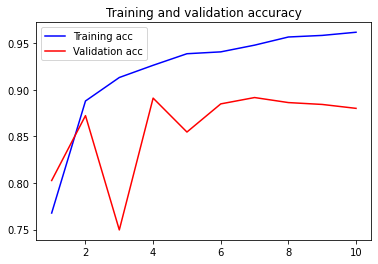

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend(); plt.show()